# Métodos predictivos: tarea de asignación (semana 2)
Ya conoces una gran variedad de métodos de regresión múltiple y cómo pueden ajustarse utilizando las librerías *statsmodels* y *scikit-learn*. El objetivo de esta tarea es analizar un conjunto de datos y comparar varios métodos de regresión múltiple para estudiar cómo de bien se ajustan a los datos.

## Descripción de la tarea
La tarea consta de tres apartados:
1. Selección y análisis de un conjunto de datos.
2. Ejecución de dos métodos de regresión múltiple.
3. Evaluación de los modelos de regresión obtenidos, analizando cuál de ellos consigue un mejor ajuste a los datos.

## Instrucciones
En este *notebook* no se presenta parte del código desarrollado, pero sí se indican los pasos mínimos que debe seguir el estudiante para completar la tarea. El estudiante puede añadir otras celdas de código según sea necesario, pero respetando la organización de apartados propuesta. El estudiante puede elegir entre trabajar con *statsmodels* o con *scikit-learn*.


## 1. Selección y análisis de un conjunto de datos
Paso 1.1: Importa los paquetes necesarios.

In [17]:
#COMPLETAR
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import Ridge, ElasticNet
import pandas as pd
import seaborn as sns

Paso 1.2: Carga un conjunto de datos de entre los disponibles en la librería seleccionada. Puedes encontrarlos en:


*   statsmodels: https://www.statsmodels.org/stable/datasets/index.html
*   scikit-learn: https://scikit-learn.org/stable/datasets.html



In [18]:
#COMPLETAR
dataset = load_boston()

Paso 1.3: Muestra información acerca de la distribución de las características en el conjunto de datos elegido.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


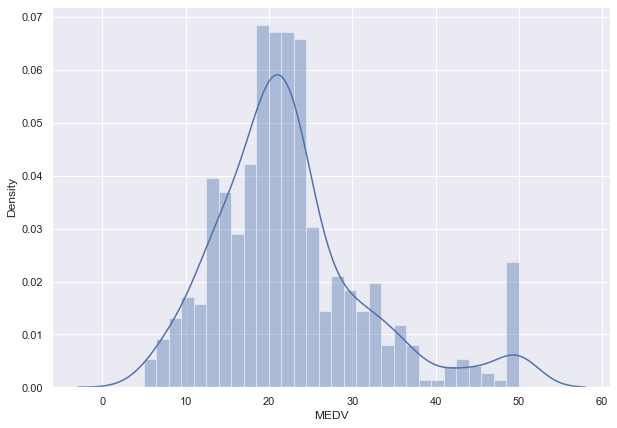

In [19]:
#COMPLETAR
data = pd.DataFrame(dataset["data"], columns=dataset["feature_names"])
target = pd.DataFrame(dataset["target"], columns= ["MEDV"])

data["MEDV"] = target["MEDV"]

sns.set(rc={'figure.figsize': (10, 7)})
sns.distplot(data["MEDV"], bins=30)

data.describe()


<AxesSubplot:>

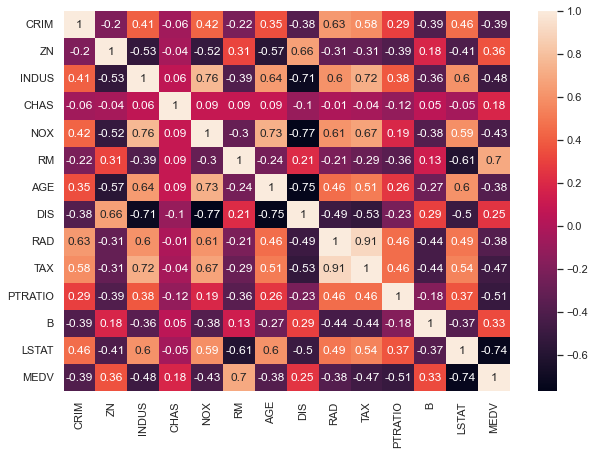

In [20]:
corr_mat = data.corr().round(2)

sns.heatmap(data=corr_mat, annot=True)

<AxesSubplot:xlabel='LSTAT', ylabel='Density'>

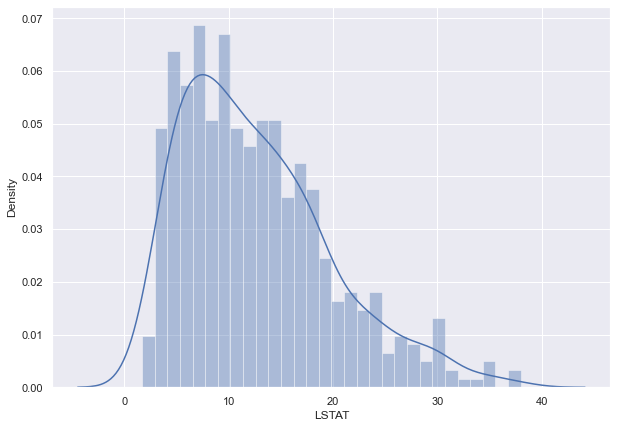

In [21]:
sns.set(rc={'figure.figsize': (10, 7)})
sns.distplot(data["LSTAT"], bins=30)

<AxesSubplot:xlabel='RM', ylabel='Density'>

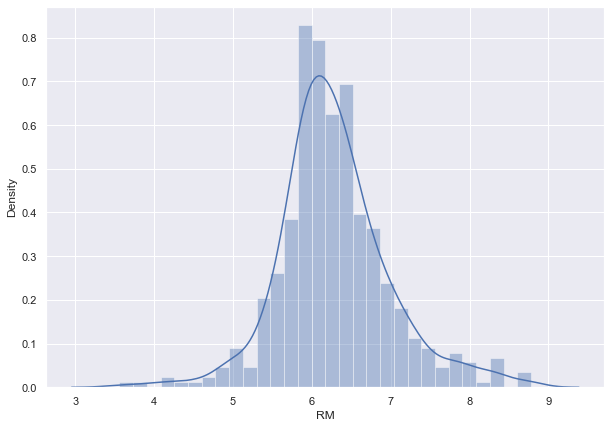

In [22]:
sns.set(rc={'figure.figsize': (10, 7)})
sns.distplot(data["RM"], bins=30)

<AxesSubplot:xlabel='PTRATIO', ylabel='Density'>

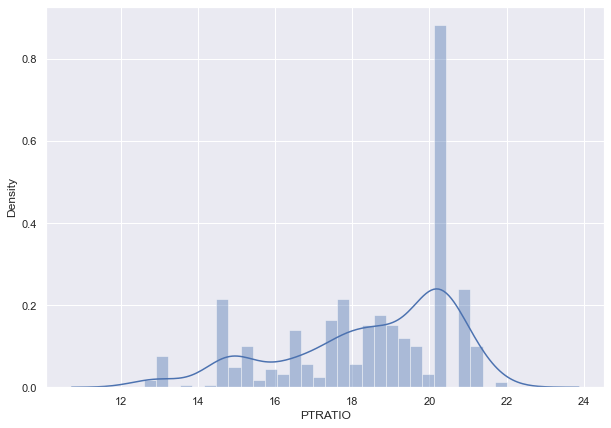

In [23]:
sns.set(rc={'figure.figsize': (10, 7)})
sns.distplot(data["PTRATIO"], bins=30)

Paso 1.4: Si es necesario, realiza un preprocesado de las variables (eliminar valores perdidos, escalar valores, etc).

In [24]:
#COMPLETAR
y = data["MEDV"]
x = data[["LSTAT", "RM", "PTRATIO"]]

*Añade aquí una breve explicación de las decisiones tomadas en el apartado 1.*

Se ha seleccionado el dataset de la libería scikit-learn de [boston](https://scikit-learn.org/stable/datasets/toy_dataset.html#boston-house-prices-dataset) ya que nos plantea un problema de regresión, en el que contamos con **13 predictores** y u**na variable de salida** continua (no categórica). Para ello, tras cargar el dataset, comprobamos la distribución de la variable de la salida, y se puede observar que sigue una distribución continua, aunque, también se puede observar que cuenta con outliers. 

Una vez hemos observado la distribución de los datos de salida, se muestra la relación de la variable de salida con las demás variables, haciendo uso de la matriz de correlación. De esta matriz, se puede observar que las variables, **RM** y **LSTAT** que presentan una relación fuerte (+/- 0.7), aunque también se puede observar que al variable **PTRATIO** presenta alguna correlación con la variable de salirda. Finalmente, se puede observar que dos de los predictores (**RM** y **LSTAT**) también presentan una distribución normal en sus datos, aunque, la variable **LSTAT** presenta una inclinación a la derecha con respecto al centro del histograma.

Para terminar, almacenamos la variable de salida (MEDV) en la varible __y__, y los predictores (LSTAT y RM y PTRATIO) en la variable __x__ para su posterior separación en conjunto de train y test.

## 2. Ejecución de métodos de regresión múltiple
Paso 2.1: Particiona el conjunto de datos en entrenamiento y test.

In [25]:
#COMPLETAR
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)


Paso 2.2: Configura y realiza el ajuste del primer método de regresión elegido. Utiliza solo la partición de entrenamiento.

In [26]:
#COMPLETAR
alg = ElasticNet(alpha=1) # Este modelo utiliza la regularización l1 y l2

modelo_eln = alg.fit(x_train, y_train)

Paso 2.3: Configura y realiza el ajuste del segundo método de regresión elegido. Utiliza solo la partición de entrenamiento.

In [27]:
#COMPLETAR
alg = Ridge(alpha=1) # Este modelo utiliza la regularización l2

modelo_ridge = alg.fit(x_train, y_train)

*Añade aquí una breve explicación de las decisiones tomadas en el apartado 2*

Para realizar la partición de los datos, se ha usado la función **train_test_split**, ya que nos permite realizar una partición de train y test con un porcentaje. El valor de este porcentaje ha sido elegido ya que es el porcentaje más usado dentro de la literatura.

Con respecto a los modelos, se han elegido dos modelos de regresión que nos permiten realizar una regularización sobre el modelo. **ElasticNet** nos permite realizar una regularización de tipo l1 o l2 ajustando el valor del parámetro l1_ratio (por defecto 0.5), el cuál, si toma un valor de 1, se aplicará una regularización l1. En cambio, si toma un valor de 0, se aplicará una regularización de tipo l2. Por el contrario, el modelo **Ridge** sólo nos permite aplicar una regularización de tipo l2. 

Estos dos modelos han sido elegidos para poder observar la importancia de la regularización a la hora de contruir un modelo de regresión.

## 3. Evaluación de los modelos de regresión obtenidos


Paso 3.1: Muesta la información sobre los modelos obtenidos (valores de los coeficientes, calidad del ajuste, estadísticos, etc.)

In [28]:
print("ElasticNet - intercepto: " + str(modelo_eln.intercept_))
print("ElasticNet - coeficientes :", list(zip(x_train.columns, modelo_eln.coef_.flatten(), )))
print("ElasticNet - R^2: " + str(modelo_eln.score(x_train, y_train)))

ElasticNet - intercepto: 44.92140716610644
ElasticNet - coeficientes : [('LSTAT', -0.7654545048046004), ('RM', 1.07131979645707), ('PTRATIO', -1.0408670312974757)]
ElasticNet - R^2: 0.6459000873600418


In [29]:
#COMPLETAR
print("Ridge - intercepto: " + str(modelo_ridge.intercept_))
print("Ridge - coeficientes :", list(zip(x_train.columns, modelo_ridge.coef_.flatten(), )))
print("Ridge - R^2: " + str(modelo_ridge.score(x_train, y_train)))


Ridge - intercepto: 25.639991618615078
Ridge - coeficientes : [('LSTAT', -0.5974996421255592), ('RM', 3.9271478213741977), ('PTRATIO', -1.0892656813034944)]
Ridge - R^2: 0.6777793626298151


Paso 3.2: Utiliza los modelos obtenidos en el apartado anterior para predecir sobre la partición de test.

In [30]:
#COMPLETAR

y_pred_eln = modelo_eln.predict(x_test)

y_pred_ridge = modelo_ridge.predict(x_test)

Paso 3.3: Calcula métricas de evaluación para estudiar la calidad de la estimación

In [31]:
print("Test evaluation: ")
print("ElasticNet - RMSE: " + str(mean_squared_error(y_test, y_pred_eln)))
print("ElasticNet - MAE: " + str(mean_absolute_error(y_test, y_pred_eln)))
print("ElasticNet - R_2: " + str(r2_score(y_test, y_pred_eln)))

Test evaluation: 
ElasticNet - RMSE: 27.901940419846543
ElasticNet - MAE: 3.846036202133879
ElasticNet - R_2: 0.6084874089334258


In [32]:
print("Test evaluation: ")
print("Ridge - RMSE: " + str(mean_squared_error(y_test, y_pred_ridge)))
print("Ridge - MAE: " + str(mean_absolute_error(y_test, y_pred_ridge)))
print("Ridge - R_2: " + str(r2_score(y_test, y_pred_ridge)))

Test evaluation: 
Ridge - RMSE: 23.44926845679084
Ridge - MAE: 3.3841369676065014
Ridge - R_2: 0.6709661151163637


*Añade aquí una breve explicación de los resultados obtenidos en el apartado 3.*

De los resultados se puede observar que ninguno de los modelos devuelve buenos resultados, ni en el proceso de entrenamiento (un score de 0.64 y 0.68) ni en el proceso de test (0.60, 0.67). Aún así, no se puede asumir que los modelos no estén funcionando correctamente, ya que sólamente se realiza una iteración en el proceso de entrenamiento. Haría falta más de una iteración para poder comprobar que los modelos están aprendiendo correctamente o, si estamos en una situación de overfitting/underfitting.

Además, se puede observar que las métricas de evaluación de test muestran unos erroes bastantes altos, siendo éstas métricas a minimizar.

Una posible manera de solucionar esto, sería realizar una validación cruzada de los datos, o también, en el proceso de entrenamiento, realizar un __early stoping__, que es la acción de parar el proceso de entrenamiento para que el modelo no sobreaprenda los datos, o bien, como se ha comentado antes, realizar más de una iteración de entrenamiento sobre los datos, para poder así confirmar el correcto, o no correcto, funcionamiento del modelo.